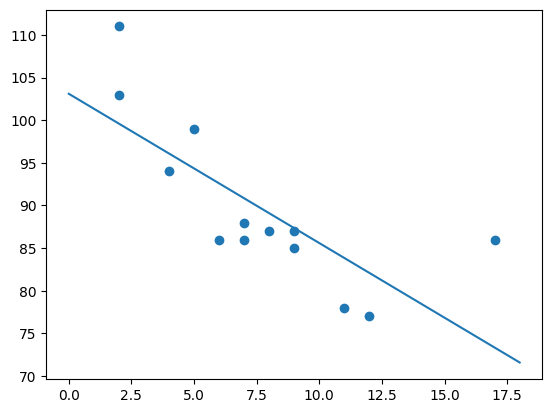

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = [5, 7, 8, 7, 2, 17, 2, 9, 4, 11, 12, 9, 6]
y = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept 

xx = np.linspace(0, 18, 180)
yy = xx * slope + intercept

plt.scatter(x, y)
plt.plot(xx, yy)
plt.show()

In [4]:
# perceptron

import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def numerical_derivative(f, x):
    delta_x = 1e-4
    gradf = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])

    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x)
        x[idx] = float(tmp_val) - delta_x
        fx2 = f(x)
        gradf[idx] = (fx1 - fx2) / (2 * delta_x)

        x[idx] = tmp_val
        it.iternext()

    return gradf

In [7]:
class logicGate:
    def __init__(self,gate_name, xdata, tdata,learning_rate=0.01,threshold=0.5):
        self.name=gate_name
        self.__xdata=xdata.reshape(4,2)
        self.__tdata=tdata.reshape(4,1)
        self.__w=np.random.rand(2,1)
        self.__b=np.random.rand(1)

        self.__learning_rate=learning_rate
        self.__threshold=threshold

    def __loss_func(self):
        delta=1e-7
        z = np.dot(self.__xdata, self.__w) + self.__b
        y = sigmoid(z)
        return -np.sum(self.__tdata * np.log(y + delta) + (1 - self.__tdata) * np.log((1 - y)+delta))

    def err_val(self):
        delta=1e-7
        z=np.dot(self.__xdata, self.__w)+self.__b
        y=sigmoid(z)
        return -np.sum(self.__tdata*np.log(y+delta)+(1-self.__tdata)*np.log((1-y)+delta))

    def train(self):
        f=lambda x : self.__loss_func()
        print("init error : ", self.err_val())
        for stp in range(20000):
            self.__w -= self.__learning_rate * numerical_derivative(f, self.__w)
            self.__b -= self.__learning_rate * numerical_derivative(f, self.__b)
            if (stp%2000 == 0):
                print("step : ", stp, "error : ", self.err_val())


In [8]:
xdata=np.array([[0,0], [0,1], [1,0],[1,1]])
tdata=np.array([[1,1,1,0]])

AND_gate=logicGate("AND_GATE",xdata,tdata,)
AND_gate.train()

for in_data in xdata:
    (sig_val, logic_val)=AND_gate.predict(in_data)
    print(in_data, " : ", logic_val)

init error :  2.9690696129979273
step :  0 error :  2.963702586127959
step :  2000 error :  0.6903359582415336
step :  4000 error :  0.40084200261950353
step :  6000 error :  0.28023220059479415
step :  8000 error :  0.21443578729020107
step :  10000 error :  0.17322147970027227
step :  12000 error :  0.145076404822936
step :  14000 error :  0.12467907629125397
step :  16000 error :  0.10923977113184159
step :  18000 error :  0.09715886031541093


AttributeError: 'logicGate' object has no attribute 'predict'

In [9]:
xdata=np.array([[0,0], [0,1], [1,0],[1,1]])
tdata=np.array([[1,0, 0, 0]])

AND_gate=logicGate("AND_GATE",xdata,tdata,)
AND_gate.train()

for in_data in xdata:
    (sig_val, logic_val)=AND_gate.predict(in_data)
    print(in_data, " : ", logic_val)

init error :  5.247750178922293
step :  0 error :  5.161787868641757
step :  2000 error :  0.4611386054386969
step :  4000 error :  0.24149831833722749
step :  6000 error :  0.16122916963641085
step :  8000 error :  0.12037475877072296
step :  10000 error :  0.0958062380427427
step :  12000 error :  0.07946263627776572
step :  14000 error :  0.06782949585166456
step :  16000 error :  0.05913775843590716
step :  18000 error :  0.05240260693663998


AttributeError: 'logicGate' object has no attribute 'predict'

In [10]:
import numpy as np
import matplotlib.pylab as plt

x = np.linspace(-2, 2, 11)
y = np.linspace(-2, 2, 11)

print(x)
print(y)

x, y = np.meshgrid(x, y)
print(x)
print(y)
f = lambda x, y : (x-1)**2 + (y-1)**2
z = f(x, y)
print(z)

[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
[[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]
 [-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]]
[[-2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2.  -2. ]
 [-1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6 -1.6]
 [-1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2 -1.2]
 [-0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8]
 [-0.4 -0.4 -0.

In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
grad_f_x = lambda x, y : 2 * (x-1)
grad_f_y = lambda x, y : 2 * (y-1)

In [13]:
dz_dx = grad_f_x(x,y)
dz_dy = grad_f_y(x,y)

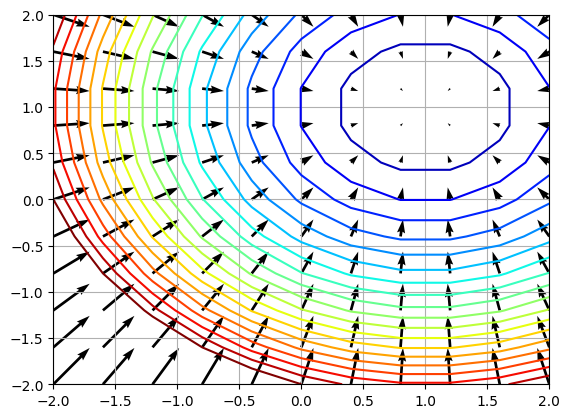

In [15]:
ax = plt.axes()
ax.contour(x,y,z,levels=np.linspace(0,10,20),cmap=plt.cm.jet)
ax.quiver(x, y, -dz_dx, -dz_dy)
ax.grid()
ax.set_label('$x$')
ax.set_label('$y$')
plt.show()

In [16]:
def f(x):
    return x**2 - 4*x + 6

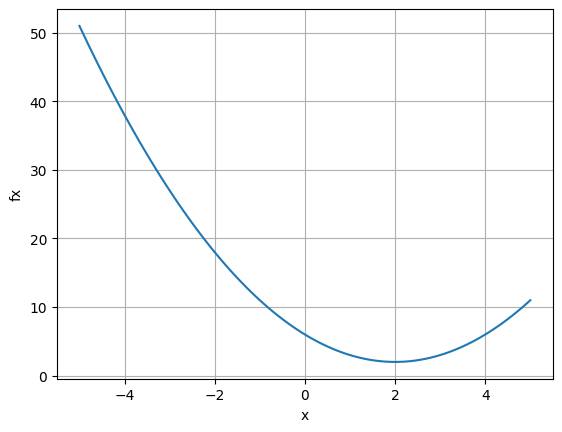

In [17]:
NumberOfPoints = 101
x = np.linspace(-5, 5, NumberOfPoints)
fx = f(x)
plt.plot(x,fx)
plt.grid()
plt.xlabel('x')
plt.ylabel('fx')
plt.show()

In [18]:
xid = np.argmin(fx)
xopt = x[xid]
print(xopt, f(xopt))

2.0 2.0


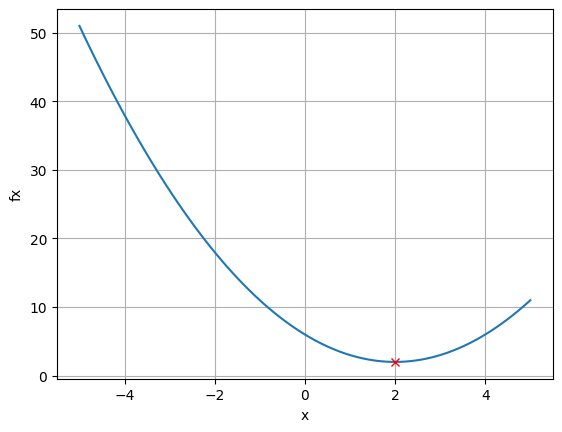

In [21]:
plt.plot(x,fx)
plt.grid()
plt.xlabel('x')
plt.ylabel('fx')
plt.plot(xopt, f(xopt), 'xr')
plt.show()

In [24]:
def f(x):
    return x**2 - 4*x + 6

def grad_fx(x):
    return 2*x - 4

def steepest_descent(func, grad_func, x0, learning_rate=0.01, Maxiter=10, verbose=True):
    paths = []
    for i in range(Maxiter):
        x1 = x0 - learning_rate * grad_func(x0)
        if verbose:
            print('{0:03d} : {1:4.3f}, {2:4.2E}'.format(i, x1, func(x1)))
        x0 = x1
        paths.append(x0)
    return (x0, func(x), paths)

In [52]:
xopt, fopt, paths=steepest_descent(f, grad_fx, 1.0, learning_rate=0.9)

000 : 2.800, 2.64E+00
001 : 1.360, 2.41E+00
002 : 2.512, 2.26E+00
003 : 1.590, 2.17E+00
004 : 2.328, 2.11E+00
005 : 1.738, 2.07E+00
006 : 2.210, 2.04E+00
007 : 1.832, 2.03E+00
008 : 2.134, 2.02E+00
009 : 1.893, 2.01E+00


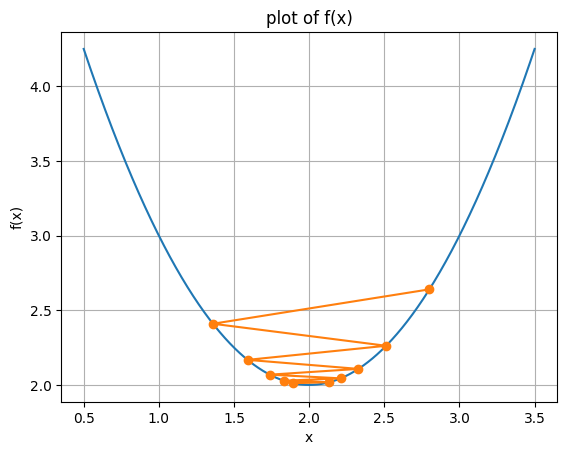

In [53]:
x = np.linspace(0.5, 3.5, 1000)
paths = np.array(paths)
plt.plot(x, f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')
plt.plot(paths, f(paths), 'o-')
plt.show()